
# COGS 189: Depression

## Overview
In this project, we ______________.<br>

### EEG Data
For this dataset, we will be using data collected from James F. Cavanagh & John J.B.Allen's Depression Rest (d003) located at the following URL: http://predict.cs.unm.edu/downloads.php.
<br>
***
## Section 1: Setup
We will be importing the following packages: <br>
- numpy
- scipy
- matplotlib
- seaborn
- pandas

In [1]:
import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
from scipy.io import loadmat                            # for importing matlab files
import matplotlib.pyplot as plt                         # for plotting
import seaborn as sns                                   # for visualization
import pandas as pd                                     # for importing datasets and handling data

Since each column in the EEG data corresponds to the columns in EEG times, we will use times_df as the column labels for data_df.

In [2]:
num = '626'
data_t = pd.read_csv('Data/' + num +'_data.csv')
channels = pd.read_csv('Data/' + num + 'c.csv')
events = pd.read_csv('Data/' + num + 'e.csv')
events['type'] = events['type'].astype(str)

In [3]:
data_t

,0,2,4,6,8,10,12,14,16,18,...,500300,500302,500304,500306,500308,500310,500312,500314,500316,500318
0,2.184466,4.032062,4.869640,7.587731,13.03088,19.95288,24.012370,23.13164,21.98522,19.74159,...,-0.151829,4.832869,12.260620,16.160120,13.942590,11.033830,10.451130,10.751970,10.114400,8.220845
1,8.229297,9.200318,9.523399,10.229610,14.05899,21.78090,27.297150,25.17288,18.87747,11.97727,...,2.475075,5.353446,9.832988,11.456250,8.203646,4.214731,2.084532,1.063246,-0.079769,-1.066953
2,-32.586990,-33.039060,-31.293920,-29.548340,-25.06820,-15.88271,-8.786496,-11.59740,-23.58491,-37.14778,...,-0.365486,-3.510298,-2.266459,0.411598,-0.434580,-2.939310,-4.526247,-5.930662,-8.131438,-9.677303


In [4]:
eyes_closed = [ '11', '13', '15']
eyes_open = ['12', '14', '16']
fs = 500
epoch_s = 0
epoch_e = 500

In [5]:
#Get relevent data from events
#TAs code

#eyes closed
dataset_closed_0 = []
dataset_closed_1 = []
dataset_closed_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_closed:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time - 1
        
        loc_1 = data_t.columns.get_loc(str(time))
        '''
        dataset_closed_0.append(data_t.iloc[0, loc_1])
        dataset_closed_1.append(data_t.iloc[1, loc_1])
        dataset_closed_2.append(data_t.iloc[2, loc_1])
        '''
       
        
        dataset_closed_0.append(data_t.iloc[0, loc_1])
        dataset_closed_0.append(data_t.iloc[1, loc_1])
        dataset_closed_0.append(data_t.iloc[2, loc_1])
        

#eyes open
dataset_open_0 = []
dataset_open_1 = []
dataset_open_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_open:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time - 1
        
        loc_1 = data_t.columns.get_loc(str(time))
        '''
        dataset_open_0.append(data_t.iloc[0, loc_1])
        dataset_open_1.append(data_t.iloc[1, loc_1])
        dataset_open_2.append(data_t.iloc[2, loc_1])
        '''
       
        
        dataset_open_0.append(data_t.iloc[0, loc_1])
        dataset_open_0.append(data_t.iloc[1, loc_1])
        dataset_open_0.append(data_t.iloc[2, loc_1])
        

In [6]:
#Convert to df

#closed_0 = pd.DataFrame(np.array(dataset_closed_0))
#closed_1 = pd.DataFrame(np.array(dataset_closed_1))
#closed_2 = pd.DataFrame(np.array(dataset_closed_2))

#open_0 = pd.DataFrame(np.array(dataset_open_0))
#open_1 = pd.DataFrame(np.array(dataset_open_1))
#open_2 = pd.DataFrame(np.array(dataset_open_2))
'''
#transpose
closed0 = np.transpose(closed_0)
closed1 = np.transpose(closed_1)
closed2 = np.transpose(closed_2)

open0 = np.transpose(open_0)
open1 = np.transpose(open_1)
open2 = np.transpose(open_2)

#combine O1, Oz, O2

temp = pd.concat([closed0,closed1],ignore_index=True)
closed_data = pd.concat([temp,closed2],ignore_index=True)

temp = pd.concat([open0,open1],ignore_index=True)
open_data = pd.concat([temp,open2],ignore_index=True)
'''

'\n#transpose\nclosed0 = np.transpose(closed_0)\nclosed1 = np.transpose(closed_1)\nclosed2 = np.transpose(closed_2)\n\nopen0 = np.transpose(open_0)\nopen1 = np.transpose(open_1)\nopen2 = np.transpose(open_2)\n\n#combine O1, Oz, O2\n\ntemp = pd.concat([closed0,closed1],ignore_index=True)\nclosed_data = pd.concat([temp,closed2],ignore_index=True)\n\ntemp = pd.concat([open0,open1],ignore_index=True)\nopen_data = pd.concat([temp,open2],ignore_index=True)\n'

In [7]:
closed_data = dataset_closed_0

In [8]:
open_data = dataset_open_0

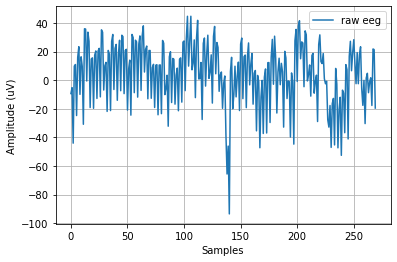

In [9]:
#Eyes closed
a = np.transpose(closed_data)
plt.plot(a, label = "raw eeg");
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

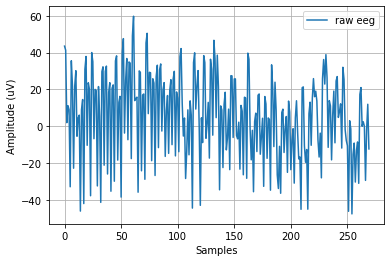

In [10]:
#Open Eyes
a = np.transpose(open_data)
plt.plot(a, label = "raw eeg");
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

In [11]:
data = closed_data

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)


# Define EEG bands
eeg_bands = {'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass

data = open_data

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

# Take the max of the fft amplitude for each EEG band
eeg_band_fft_open = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft_open[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass



In [12]:
eeg_band_fft

{'Theta': 622.0692123571075,
 'Alpha': 761.0145278510035,
 'Beta': 467.59899457587983,
 'Gamma': 261.4898936255928}

In [13]:
eeg_band_fft_open

{'Theta': 384.4701010820032,
 'Alpha': 522.5246527504813,
 'Beta': 274.472753022864,
 'Gamma': 352.3868280111476}

Text(0, 0.5, 'Mean band Amplitude')

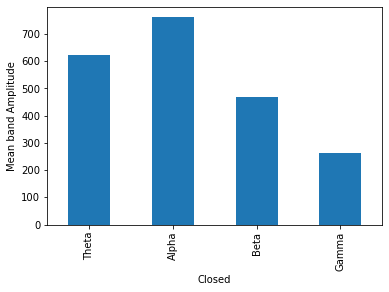

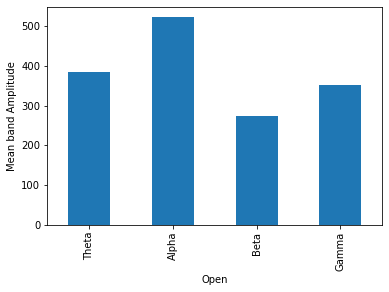

In [14]:
# Plot the data 
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Closed")
ax.set_ylabel("Mean band Amplitude")

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft_open[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Open")
ax.set_ylabel("Mean band Amplitude")

In [15]:
closed_a = eeg_band_fft['Alpha']
open_a = eeg_band_fft_open['Alpha']
depressed = 0
df = pd.DataFrame([open_a, closed_a, depressed])
df = np.transpose(df)
df.columns=['open_alpha', 'closed_alpha', 'depressed']
df

,open_alpha,closed_alpha,depressed
0,522.524653,761.014528,0.0
